In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data
file_path = 'Resources/diabetes_data.csv'
df = pd.read_csv(file_path)
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes', axis=1)
y = df['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
cols = df.unique

Age                     13
Sex                      2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Stroke                   2
HighBP                   2
Diabetes                 2
dtype: int64

# Feature Importance

In [33]:
# Feature Importance
# What features are considered important?
# guided by https://betterdatascience.com/feature-importance-python/
from sklearn.linear_model import LogisticRegression

mdl = LogisticRegression().fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': mdl.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

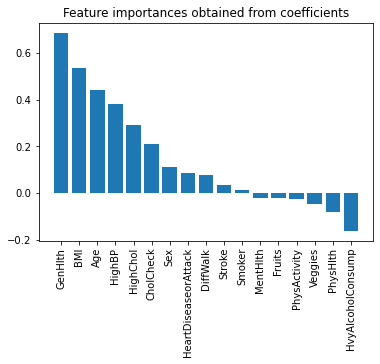

In [5]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients')
plt.xticks(rotation='vertical')
plt.show()

According to the data, GenHlth, BMI, Age, HighBP, and CholCheck are the features that have a bigger affect on the outcome of predicting diabetes in a patient.

Interestingly, heavy alcholol consumption has a negative correlation to predicting diabetes.

# Data Exploration

In [6]:
# What is the correlation of Age and Diabetes?
corr = df['Age'].corr(df['Diabetes'])
corr

0.27873806628190145

In [7]:
# What is the correlation of Sex and Diabetes?
# "Does gender affect diabetes?"
corr = df['Sex'].corr(df['Diabetes'])
corr

0.04441285837125938

In [8]:
type(df['Age'].index)

pandas.core.indexes.range.RangeIndex

In [9]:
# Which age group has the most occurences of diabetes?

diabetic_lst = []
non_diabetic_lst = []

for index, row in df.iterrows():
    if row['Diabetes'] == 1:
        diabetic_lst.append(row)
    else:
        non_diabetic_lst.append(row)

In [10]:
diabetic_df = pd.DataFrame(diabetic_lst)
non_diabetic_df = pd.DataFrame(non_diabetic_lst)

Text(0, 0.5, 'Sum of Diabetics')

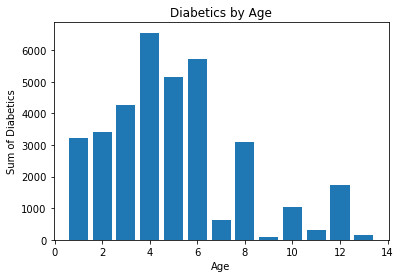

In [11]:
# graphing by age grouping. (see the website page for breakdown of bins from Kaggle)
fig, ax = plt.subplots()

labels = diabetic_df['Age'].unique()
sums = diabetic_df.groupby(by=['Age']).sum()

ax.bar(labels, sums['Diabetes'])
ax.set_xlabel('Age')
ax.set_title('Diabetics by Age')
ax.set_ylabel('Sum of Diabetics')

According to our data, the ages are grouped by this schema: 

"13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older"

We can infer from this data that each number is equivalent to 5 years. If this is true, then age group 4 would be the ages of 35 to 39, age group 5 would be 40 to 44, age group 6 is 45 to 49. 

How do these age groups compare in terms of health?
    - can we compare the age groups by general health?

Text(0, 0.5, 'Sum of Diabetics')

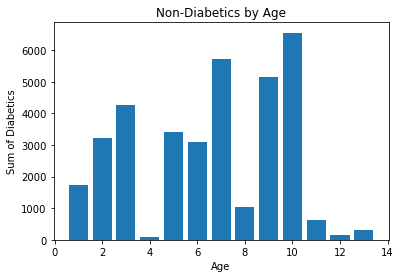

In [12]:
# how do non diabetics fare?
fig, ax = plt.subplots()

labels = non_diabetic_df['Age'].unique()
sums = df.groupby(by=['Age']).sum()

ax.bar(labels, sums['Diabetes'])
ax.set_xlabel('Age')
ax.set_title('Non-Diabetics by Age')
ax.set_ylabel('Sum of Diabetics')

Interestingly, age group 4 (ages 35 to 39) is simultaniously the largest majority of diabetics as well as the the lowest amount of diabetics. 

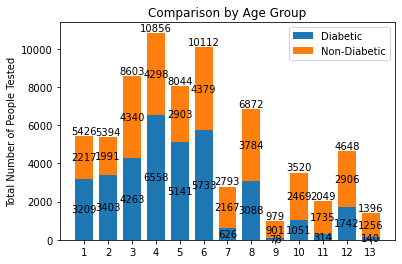

<Figure size 720x720 with 0 Axes>

In [13]:
# how do these graphs compare?
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py

# ==============================
# need to clean this chart later
# ==============================

labels = diabetic_df['Age'].unique()
diabetic = list(diabetic_df.groupby(by=['Age']).count()['Diabetes'])
non_diabetic = list(non_diabetic_df.groupby(by=['Age']).count()['Diabetes'])
width = .75       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

fig = plt.figure(figsize=(10,10))

p1 = ax.bar(labels, diabetic, width, label='Diabetic')
p2 = ax.bar(labels, non_diabetic, width, bottom=diabetic, label='Non-Diabetic')

ax.axhline(0, color='grey', linewidth=1)
ax.set_ylabel('Total Number of People Tested')
ax.set_title('Comparison by Age Group')
ax.set_xticks(labels)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)


plt.show()

### Areej will write

In [14]:
# Splitting the dataframe to their respective age groups.

lst_age_4 = []
lst_age_5 = []
lst_age_6 = []

for col, row in df.iterrows():
    if row['Age'] == 4:
        lst_age_4.append(row)
    if row['Age'] == 5:
        lst_age_5.append(row)
    if row['Age'] == 6:
        lst_age_6.append(row)
        
# to dataframe

age_4_df = pd.DataFrame(lst_age_4)
age_5_df = pd.DataFrame(lst_age_5)
age_6_df = pd.DataFrame(lst_age_6)
age_6_df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
7,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0
20,6.0,0.0,0.0,1.0,22.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28,6.0,0.0,0.0,1.0,38.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0
38,6.0,1.0,1.0,1.0,31.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Splitting the dataframe by their respective sex.

# according to data, male = 1
lst_sex_male = []
lst_sex_female = []

for col, row in df.iterrows():
    if row['Sex'] == 1:
        lst_sex_male.append(row)
    else:
        lst_sex_female.append(row)

# convert to DF
male_df = pd.DataFrame(lst_sex_male)
female_df = pd.DataFrame(lst_sex_female)
female_df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
10,12.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,1.0,0.0
14,10.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
# What is the correlation of BMI and Diabetes?
corr = df['BMI'].corr(df['Diabetes'])
corr

0.29337274476104674

In [17]:
# What is the correlation of General Health and Diabetes?
corr = df['GenHlth'].corr(df['Diabetes'])
corr

0.40761159849491413

Text(0, 0.5, 'Sum of Diabetics')

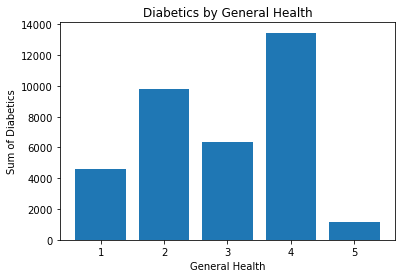

In [18]:
# graphing by general health for diabetics
fig, ax = plt.subplots()

labels = diabetic_df['GenHlth'].unique()
sums = diabetic_df.groupby(by=['GenHlth']).count()

ax.bar(labels, sums['Diabetes'])
ax.set_xlabel('General Health')
ax.set_title('Diabetics by General Health')
ax.set_ylabel('Sum of Diabetics')

### Miguel

Text(0, 0.5, 'Sum of Non Diabetics')

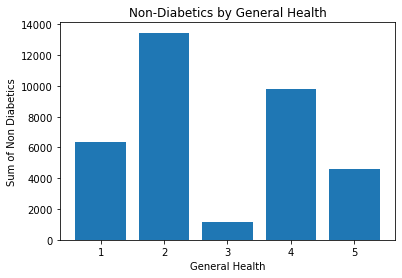

In [19]:
# how do non diabetics fare?
fig, ax = plt.subplots()

labels = non_diabetic_df['GenHlth'].unique()
sums = df.groupby(by=['GenHlth']).sum()

ax.bar(labels, sums['Diabetes'])
ax.set_xlabel('General Health')
ax.set_title('Non-Diabetics by General Health')
ax.set_ylabel('Sum of Non Diabetics')

### Cheng

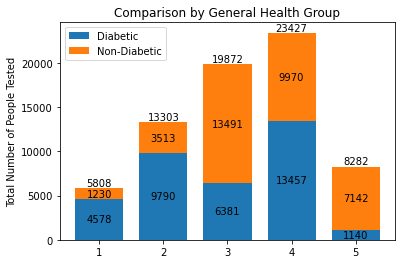

<Figure size 720x720 with 0 Axes>

In [20]:
labels = diabetic_df['GenHlth'].unique()
diabetic = list(diabetic_df.groupby(by=['GenHlth']).count()['Diabetes'])
non_diabetic = list(non_diabetic_df.groupby(by=['GenHlth']).count()['Diabetes'])

fig, ax = plt.subplots()

fig = plt.figure(figsize=(10,10))

p1 = ax.bar(labels, diabetic, width, label='Diabetic')
p2 = ax.bar(labels, non_diabetic, width, bottom=diabetic, label='Non-Diabetic')

ax.axhline(0, color='grey', linewidth=1)
ax.set_ylabel('Total Number of People Tested')
ax.set_title('Comparison by General Health Group')
ax.set_xticks(labels)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)


plt.show()

The highest percentage non diabetics is at 5, and the lowerest percentage is at 1 which is expected if general health correlates with diabetes. What stands out though is the fact that people with health 3 has a notably highest percentage of non diabetics than people in the group with health 4.

### Data Spread

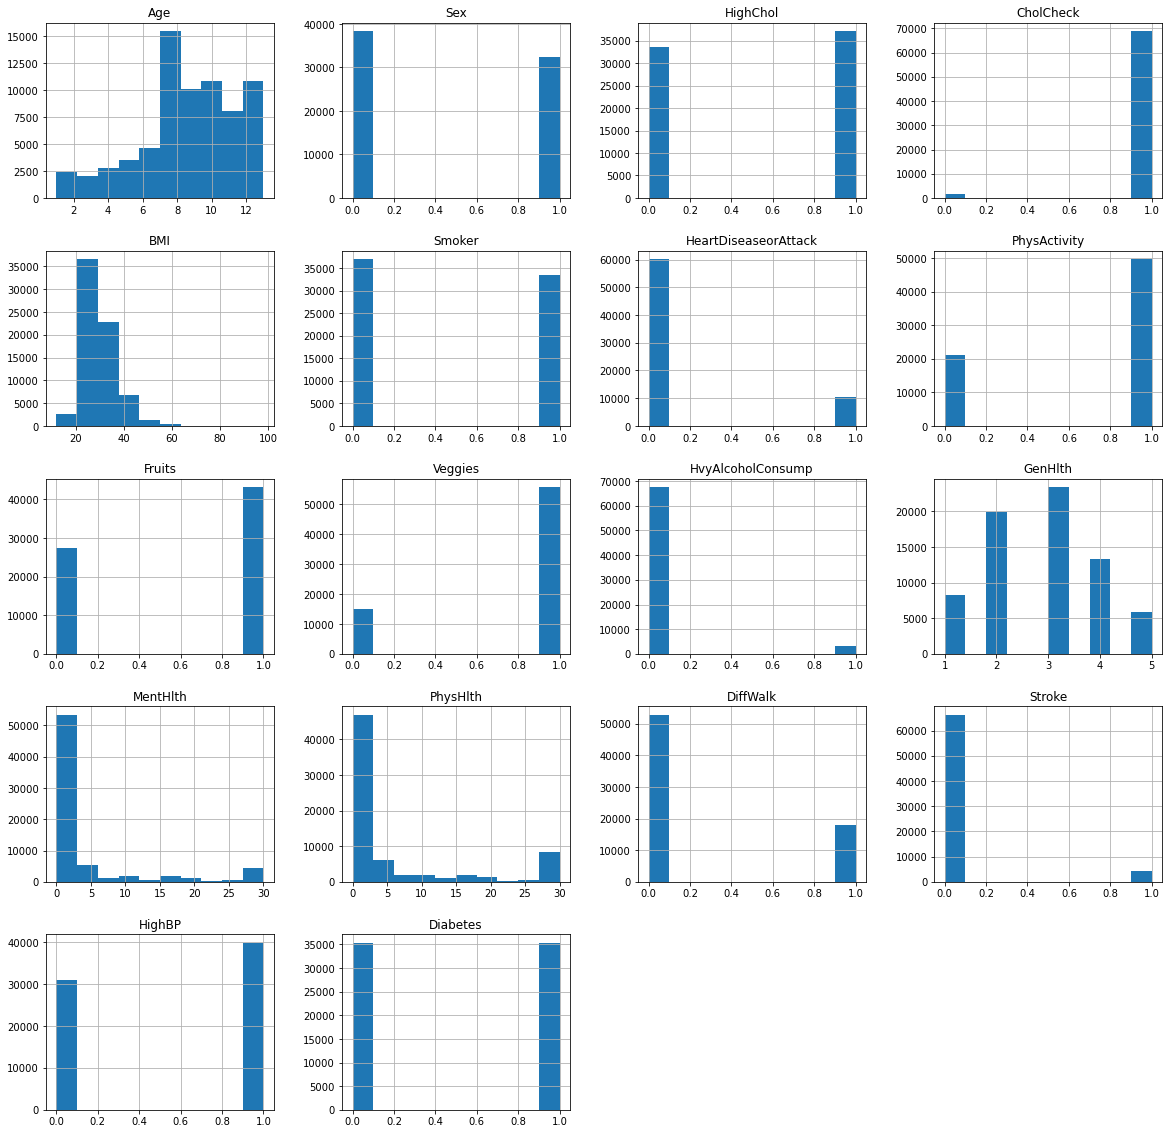

In [21]:
df.hist(figsize=(20,20))
plt.show()

### Julia

In [22]:
corr_df=df.corr()
corr_df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
Age,1.000000,-0.002315,0.240338,0.101743,-0.038648,0.105424,0.221878,-0.100753,0.061096,-0.018893,-0.057705,0.155624,-0.101746,0.084852,0.195265,0.123879,0.338132,0.278738
Sex,-0.002315,1.000000,0.017324,-0.007991,0.000827,0.112125,0.098161,0.051753,-0.088723,-0.052604,0.014164,-0.014555,-0.089204,-0.045957,-0.082248,0.003822,0.040819,0.044413
HighChol,0.240338,0.017324,1.000000,0.085981,0.131309,0.093398,0.181187,-0.090453,-0.047384,-0.042836,-0.025443,0.237778,0.083881,0.142610,0.162043,0.099786,0.316515,0.289213
CholCheck,0.101743,-0.007991,0.085981,1.000000,0.045648,-0.004331,0.043497,-0.008249,0.017384,0.000349,-0.027146,0.059213,-0.010660,0.034540,0.044430,0.022529,0.103283,0.115382
BMI,-0.038648,0.000827,0.131309,0.045648,1.000000,0.011551,0.060355,-0.170936,-0.084505,-0.056528,-0.058232,0.267888,0.104682,0.161862,0.246094,0.022931,0.241019,0.293373
Smoker,0.105424,0.112125,0.093398,-0.004331,0.011551,1.000000,0.124418,-0.079823,-0.074811,-0.029926,0.077835,0.152416,0.091257,0.120698,0.119789,0.064658,0.087438,0.085999
HeartDiseaseorAttack,0.221878,0.098161,0.181187,0.043497,0.060355,0.124418,1.000000,-0.098223,-0.019436,-0.036315,-0.037130,0.275868,0.075057,0.198416,0.232611,0.223394,0.210750,0.211523
PhysActivity,-0.100753,0.051753,-0.090453,-0.008249,-0.170936,-0.079823,-0.098223,1.000000,0.133813,0.149322,0.019111,-0.273548,-0.130090,-0.234500,-0.276868,-0.079985,-0.136102,-0.158666
Fruits,0.061096,-0.088723,-0.047384,0.017384,-0.084505,-0.074811,-0.019436,0.133813,1.000000,0.238605,-0.033246,-0.098687,-0.062102,-0.048572,-0.050784,-0.008996,-0.040852,-0.054077
Veggies,-0.018893,-0.052604,-0.042836,0.000349,-0.056528,-0.029926,-0.036315,0.149322,0.238605,1.000000,0.022090,-0.115795,-0.052359,-0.066896,-0.084072,-0.047601,-0.066624,-0.079293


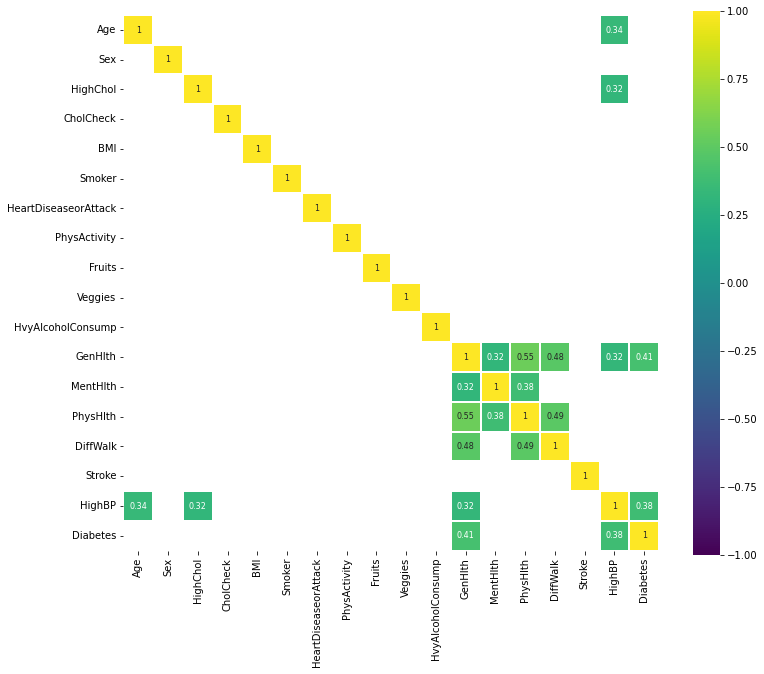

In [23]:
import seaborn as sb
corr = df.corr() 
plt.figure(figsize=(12, 10))

sb.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, 
            annot_kws={"size": 8}, square=True);

### Julia

### Feature Engineering

In [38]:
# Combining GenHlth, MntHlth, PhysHlth, DiffWalk together by getting the sum of products of these features
temp_df = df

# I can't multiply by 0, so I must scale the following columns by + 1.

for col, row in temp_df.iterrows():
    row['GenHlth'] = row['GenHlth'] + 1;
    row['PhysHlth'] = row['PhysHlth'] + 1;
    row['MentHlth'] = row['MentHlth'] + 1;
    row['DiffWalk'] = row['DiffWalk'] + 1;
    row['PhysActivity'] = row['PhysActivity'] + 1;

In [39]:
general_health = temp_df['GenHlth'] * temp_df['PhysHlth'] * temp_df['MentHlth'] * temp_df['DiffWalk'] * temp_df['PhysActivity']
temp_df['GenHlth'] = general_health
feature_engineering_df = temp_df
feature_engineering_df = feature_engineering_df.drop(['PhysHlth', 'MentHlth', 'DiffWalk', 'PhysActivity', 'Fruits', 'Veggies'], axis = 1)
feature_engineering_df.head()

scaler.fit(feature_engineering_df)

StandardScaler()

We dropped fruits and veggies due to ther insignificance in the correlation chart. 

In [40]:
feature_engineering_df['GenHlth'] = scaler.transform(feature_engineering_df)
feature_engineering_df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,Fruits,Veggies,HvyAlcoholConsump,GenHlth,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,-1.607237,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,0.0,0.0,1.197681,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,0.0,1.548296,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,0.0,0.847066,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,0.0,-0.204778,0.0,0.0,0.0
